# Advanced Regression Assignment

## Step 1: Data Understanding and Cleaning

In [1]:
# Importing of the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading data files
housing_data = pd.read_csv("train.csv")

In [3]:
#Look at the housing_data head
print(housing_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
#Inspect the strucutre etc.
print(housing_data.info(), "\n")
print(housing_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Lets see the statical data of the numeric data
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Lets remove the Id columns from the data
housing_data = housing_data.drop(['Id'],axis=1)
housing_data.shape

(1460, 80)

### Lets check the highly corrrelated variables
Ref - https://www.dezyre.com/recipes/drop-out-highly-correlated-features-in-python

In [7]:
correlation_matrix = housing_data.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column]>0.8)]
print(to_drop)

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']


In [8]:
# Lets drop the above 4 variables
housing_data.drop(housing_data[to_drop],axis=1,inplace=True)
housing_data.shape

(1460, 76)

In [9]:
# Lets look at the missing values in housing data
housing_data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

In [10]:
#Missing value in the housing data in all the columns in percentage
Null_val = round(housing_data.isnull().sum()/len(housing_data.index)*100,2)
Null_val

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 76, dtype: float64

In [11]:
#Selecting all the columns having missing values more than 0%
Null_val.loc[Null_val > 0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [12]:
# Lets check the columns from the data having missing values more than 70%
remove_columns = list(Null_val[Null_val >= 80].index)
remove_columns

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [13]:
# Lets remove the above columns from the data
housing_data = housing_data.drop(remove_columns,axis=1)
housing_data.shape

(1460, 72)

In [14]:
#Again Selecting all the columns having missing values more than 0%
Null_val1 = round(housing_data.isnull().sum()/len(housing_data.index)*100,2)
Null_val1.loc[Null_val1 > 0]

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64

### Lets check the unique values present in the above variables

In [15]:
print("LotFrontage:%d" % len(housing_data.LotFrontage.unique()))
print("MasVnrType:%d" % len(housing_data.MasVnrType.unique()))
print("MasVnrArea:%d" % len(housing_data.MasVnrArea.unique()))
print("BsmtQual:%d" % len(housing_data.BsmtQual.unique()))
print("BsmtCond:%d" % len(housing_data.BsmtCond.unique()))
print("BsmtExposure:%d" % len(housing_data.BsmtExposure.unique()))
print("BsmtFinType1:%d" % len(housing_data.BsmtFinType1.unique()))
print("BsmtFinType2:%d" % len(housing_data.BsmtFinType2.unique()))
print("Electrical:%d" % len(housing_data.Electrical.unique()))
print("FireplaceQu:%d" % len(housing_data.FireplaceQu.unique()))
print("GarageType:%d" % len(housing_data.GarageType.unique()))
print("GarageFinish:%d" % len(housing_data.GarageFinish.unique()))
print("GarageQual:%d" % len(housing_data.GarageQual.unique()))
print("GarageCond:%d" % len(housing_data.GarageCond.unique()))

LotFrontage:111
MasVnrType:5
MasVnrArea:328
BsmtQual:5
BsmtCond:5
BsmtExposure:5
BsmtFinType1:7
BsmtFinType2:7
Electrical:6
FireplaceQu:6
GarageType:7
GarageFinish:4
GarageQual:6
GarageCond:6


### From the above it can be seen that except the variables "LotFrontage & MasVnrArea" all hte others variables are clearly categorical varibales. Lets see the each categorical variables separately.

In [16]:
# 1) MasVnrType - Lets check the unique values
housing_data.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

##### From the data definition, MasVnrType is the "Masonry veneer type". So lets impute the missing value with mode value rather than to remove the missing value so as to prevent any data loss.

In [17]:
# Imputing the missing values with mode value.
housing_data["MasVnrType"] = housing_data["MasVnrType"].fillna(housing_data["MasVnrType"].mode()[0])
housing_data.MasVnrType.unique() # Checking the updated values

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [18]:
# 2) BsmtQual - Lets check the unique values
housing_data.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

### As per data definition,BsmtQual  is "Evaluates the height of the basement":
- Ex	Excellent (100+ inches)	
- Gd	Good (90-99 inches)
- TA	Typical (80-89 inches)
- Fa	Fair (70-79 inches)
- Po	Poor (<70 inches
- NA	No Basement

### From above it can be concluded that Na/nan is not missing value but one of the category "No Basement"
- Lets assign NA/nan as 'NB' for "No Basement" so that data will not read it as NA/nan.

In [19]:
# Replacing the NA/nan with 'NB' for BsmtQual
housing_data["BsmtQual"] = housing_data["BsmtQual"].fillna('NB')
housing_data.BsmtQual.value_counts() # Checking the updated values

TA    649
Gd    618
Ex    121
NB     37
Fa     35
Name: BsmtQual, dtype: int64

In [20]:
# 3) BsmtCond - Lets check the unique values
housing_data.BsmtCond.unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

### As per data definition, BsmtCond is "Evaluates the general condition of the basement".
- Ex	Excellent
- Gd	Good
- TA	Typical - slight dampness allowed
- Fa	Fair - dampness or some cracking or settling
- Po	Poor - Severe cracking, settling, or wetness
- NA	No Basement

### From above it can be concluded that Na/nan is not missing value but one of the category "No Basement"
- Lets assign NA/nan as 'NB' for "No Basement" so that data will read it not as NA/nan.

In [21]:
# Replacing the NA/nan with 'NB' for BsmtCond
housing_data["BsmtCond"] = housing_data["BsmtCond"].fillna('NB')
housing_data.BsmtQual.value_counts() # Checking the updated values

TA    649
Gd    618
Ex    121
NB     37
Fa     35
Name: BsmtQual, dtype: int64

In [22]:
# 4) BsmtExposure - Lets check the unique values
housing_data.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

### As per data definition, BsmtExposure is "Refers to walkout or garden level walls".
- Gd	Good Exposure
- Av	Average Exposure (split levels or foyers typically score average or above)	
- Mn	Mimimum Exposure
- No	No Exposure
- NA	No Basement

### From above it can be concluded that Na/nan is not missing value but one of the category "No Basement"
- Lets assign NA/nan as 'NB' for "No Basement" so that data will read it not as NA/nan.

In [23]:
# Replacing the NA/nan with 'NB' for BsmtExposure
housing_data["BsmtExposure"] = housing_data["BsmtExposure"].fillna('NB')
housing_data.BsmtExposure.value_counts() # Checking the updated values

No    953
Av    221
Gd    134
Mn    114
NB     38
Name: BsmtExposure, dtype: int64

In [24]:
# 5) BsmtFinType1 - Lets check the unique values
housing_data.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

### As per data definition, BsmtFinType1 is "Rating of basement finished area".
- GLQ	Good Living Quarters
- ALQ	Average Living Quarters
- BLQ	Below Average Living Quarters	
- Rec	Average Rec Room
- LwQ	Low Quality
- Unf	Unfinshed
- NA	No Basement
### From above it can be concluded that Na/nan is not missing value but one of the category "No Basement"
- Lets assign NA/nan as 'NB' for "No Basement" so that data will read it not as NA/nan.

In [25]:
# Replacing the NA/nan with 'NB' for BsmtFinType1
housing_data["BsmtFinType1"] = housing_data["BsmtFinType1"].fillna('NB')
housing_data.BsmtFinType1.value_counts() # Checking the updated values

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NB      37
Name: BsmtFinType1, dtype: int64

In [26]:
# 6) BsmtFinType2 - Lets check the unique values
housing_data.BsmtFinType2.unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

### As per data definition, BsmtFinType2 is "Rating of basement finished area (if multiple types)".
- GLQ	Good Living Quarters
- ALQ	Average Living Quarters
- BLQ	Below Average Living Quarters	
- Rec	Average Rec Room
- LwQ	Low Quality
- Unf	Unfinshed
- NA	No Basement
### From above it can be concluded that Na/nan is not missing value but one of the category "No Basement"
- Lets assign NA/nan as 'NB' for "No Basement" so that data will not read it as NA/nan.

In [27]:
# Replacing the NA/nan with 'NB' for BsmtFinType2
housing_data["BsmtFinType2"] = housing_data["BsmtFinType2"].fillna('NB')
housing_data.BsmtFinType2.value_counts() # Checking the updated value

Unf    1256
Rec      54
LwQ      46
NB       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [28]:
# 7) Electrical - Lets check the unique values
housing_data.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

### As per data definition, Electrical is "Electrical system".
- SBrkr	Standard Circuit Breakers & Romex
- FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
- FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
- FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
- Mix	Mixed
##### So instead of imputing the missing value with mode value, lets remove the missing rows (0.07%) in order to ensure we do not add any bias to the data.

In [29]:
# Removing the missing rows from variabe "Electrical"
housing_data = housing_data[~housing_data.Electrical.isnull()]

In [30]:
# 8) FireplaceQU - Lets check the unique values
#housing_data.FireplaceQu.value_counts()
housing_data.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

### As per data definition, FireplaceQu  is fireplace quality:
- Ex	Excellent - Exceptional Masonry Fireplace
- Gd	Good - Masonry Fireplace in main level
- TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
- Fa	Fair - Prefabricated Fireplace in basement
- Po	Poor - Ben Franklin Stove
- NA	No Fireplace
### From above it can be concluded that Na/nan is not missing value but one of the category "No Fireplace"
- Lets assign NA/nan as 'NF' for "No Fireplace" so that data will not read as NA/nan.

In [31]:
# Replacing the NA/nan with 'NF' for No Fireplace
housing_data["FireplaceQu"] = housing_data["FireplaceQu"].fillna('NF')
housing_data.FireplaceQu.value_counts() # Checking the updated value

NF    689
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [32]:
# 9) GarageType - Lets check the unique values
housing_data.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

### As per data definition, GarageType is "Garage location":
- 2Types	More than one type of garage
- Attchd	Attached to home
- Basment	Basement Garage
- BuiltIn	Built-In (Garage part of house - typically has room above garage)
- CarPort	Car Port
- Detchd	Detached from home
- NA	No Garage
### From above it can be concluded that Na/nan is not missing value but one of the category "No Garage"
- Lets assign NA/nan as 'NG' for "No Fireplace" so that data will not read it as NA/nan.

In [33]:
# Replacing the NA/nan with 'NG' for No GarageType
housing_data["GarageType"] = housing_data["GarageType"].fillna('NG')
housing_data.GarageType.value_counts() # Checking the updated value

Attchd     870
Detchd     387
BuiltIn     87
NG          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [34]:
# 10) GarageFinish - Lets check the unique values
housing_data.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

### As per data definition, GarageFinish is "Interior finish of the garage":
Fin	Finished
RFn	Rough Finished	
Unf	Unfinished
NA	No Garage
### From above it can be concluded that Na/nan is not missing value but one of the category "No Garage"
- Lets assign NA/nan as 'NG' for "No Fireplace" so that data will not read it as NA/nan.

In [35]:
# Replacing the NA/nan with 'NG' for No No Garage
housing_data["GarageFinish"] = housing_data["GarageFinish"].fillna('NG')
housing_data.GarageFinish.value_counts() # Checking the updated value

Unf    605
RFn    422
Fin    351
NG      81
Name: GarageFinish, dtype: int64

In [36]:
# 11) GarageQual - Lets check the unique values
housing_data.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

### As per data definition, GarageQual is "Garage quality":
- Ex	Excellent
- Gd	Good
- TA	Typical/Average
- Fa	Fair
- Po	Poor
- NA	No Garage
### From above it can be concluded that Na/nan is not missing value but one of the category "No Garage"
- Lets assign NA/nan as 'NG' for "No Fireplace" so that data will not read it as NA/nan.

In [37]:
# Replacing the NA/nan with 'NG' for No Garage
housing_data["GarageQual"] = housing_data["GarageQual"].fillna('NG')
housing_data.GarageQual.value_counts() # Checking the updated value

TA    1310
NG      81
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [38]:
# 12) GarageCond - Lets check the unique values
housing_data.GarageCond.unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

### As per data definition, GarageCond is "Garage condition":
- Ex	Excellent
- Gd	Good
- TA	Typical/Average
- Fa	Fair
- Po	Poor
- NA	No Garage
### From above it can be concluded that Na/nan is not missing value but one of the category "No Garage"
- Lets assign NA/nan as 'NG' for "No Grage" so that data will not read it as NA/nan.

In [39]:
# Replacing the NA/nan with 'NG' for No Garage
housing_data["GarageCond"] = housing_data["GarageCond"].fillna('NG')
housing_data.GarageCond.value_counts()

TA    1325
NG      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

### Lets check the remaining 2 variables "LotFrontage (111) & MasVnrArea (328) having considerably high number of uniques values as shown in bracket.

In [40]:
# Lets check the variable LotFrontage
housing_data.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

### As per data definition, LotFrontage is "Linear feet of street connected to property":
- Since % of missing values is almost (18%), so lets impute the missing values with median value to prevent data loss.

In [41]:
# Imputing the missing values with mean value for variable LotFrontage
housing_data["LotFrontage"] = housing_data["LotFrontage"].replace(np.nan, housing_data["LotFrontage"].median())
housing_data.LotFrontage.unique() # Checking the updated values

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  69.,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,  67.,
        83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144., 114.,
       128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,  46.])

In [42]:
# Lets check the variable MasVnrArea, 
print("MasVnrArea:%d" % len(housing_data.MasVnrArea.unique()))

MasVnrArea:328


### We have seen above the missing value percentage is 0.55%, so removing the missing rows will not impact data.

In [43]:
# Removing the missing rows from the variable "MasVnrArea" 
housing_data = housing_data[~housing_data.MasVnrArea.isnull()]

In [44]:
#Lets check once more if any missing values present in our data
housing_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 72, dtype: int64

### Lets plot some graphs for the EDA

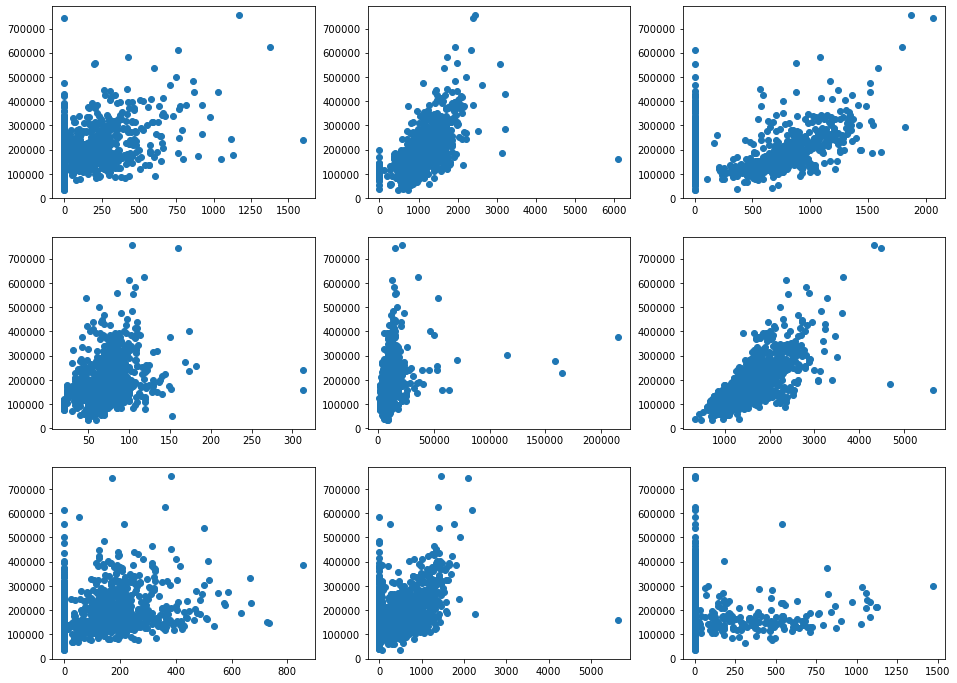

In [45]:
plt.figure(figsize=(16,12))
plt.subplot(3,3,1)
plt.scatter(housing_data['MasVnrArea'],housing_data.SalePrice)
plt.subplot(3,3,2)
plt.scatter(housing_data['TotalBsmtSF'],housing_data.SalePrice)
plt.subplot(3,3,3)
plt.scatter(housing_data['2ndFlrSF'],housing_data.SalePrice)
plt.subplot(3,3,4)
plt.scatter(housing_data['LotFrontage'],housing_data.SalePrice)
plt.subplot(3,3,5)
plt.scatter(housing_data['LotArea'],housing_data.SalePrice)
plt.subplot(3,3,6)
plt.scatter(housing_data['GrLivArea'],housing_data.SalePrice)
plt.subplot(3,3,7)
plt.scatter(housing_data['WoodDeckSF'],housing_data.SalePrice)
plt.subplot(3,3,8)
plt.scatter(housing_data['BsmtFinSF1'],housing_data.SalePrice)
plt.subplot(3,3,9)
plt.scatter(housing_data['BsmtFinSF2'],housing_data.SalePrice)

### From the above graph we can see variable 'GrLivArea' is fairly linear with SalePrice

### Plotting heatmap to check if any highly correlates variables.

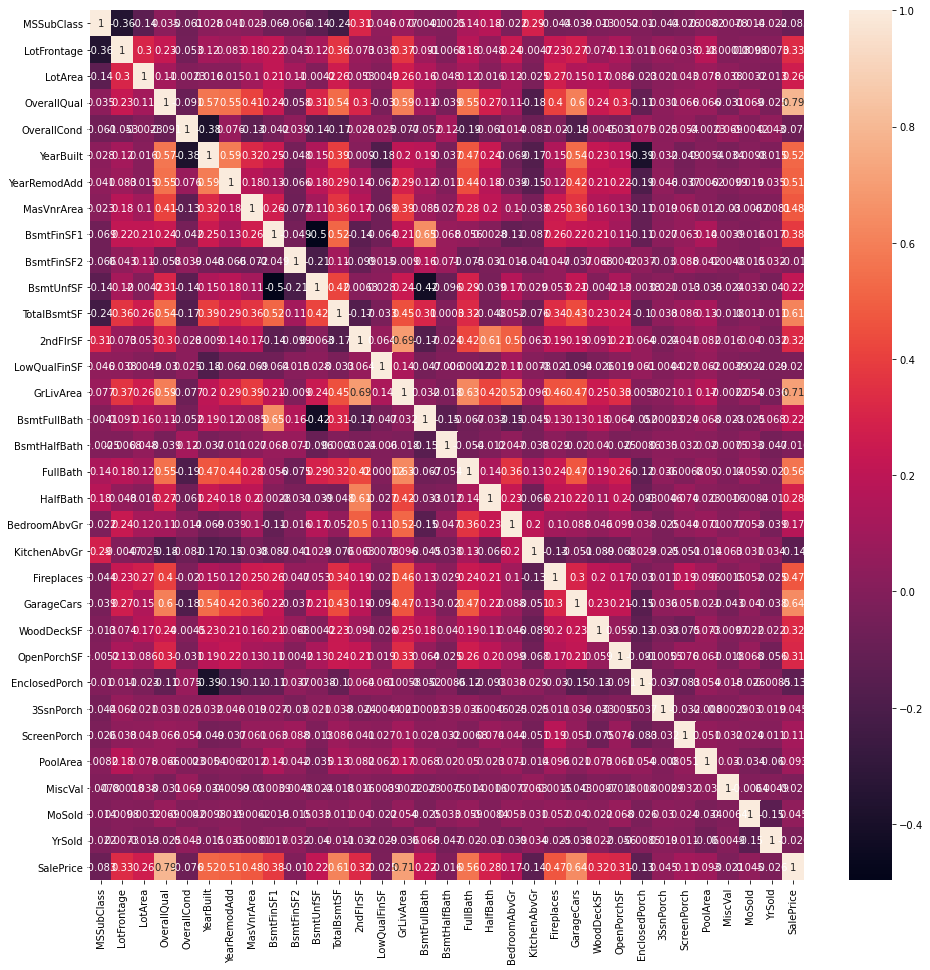

In [46]:
plt.figure(figsize=(16,16))
sns.heatmap(housing_data[list(housing_data.dtypes[housing_data.dtypes!='object'].index)].corr(),annot=True)
plt.show()

### Due to large number of veriables, values are not visible clearly. However we have already removed highly correlated variable in the initial stage. 

## Step 2: Data Preparation

### So there is no missing value in our data

In [47]:
# We have varibale "YearBuilt" having values ranging from 1872 to 2010. 
# Lets created buckets for it indicating construction type like C1, C2, etc.
pd.qcut(housing_data.YearBuilt, [0, 0.16, 0.32, 0.48, 0.64, 0.8, 1], ['C1','C2', 'C3','C4','C5','C6']).head()

0    C5
1    C4
2    C5
3    C1
4    C5
Name: YearBuilt, dtype: category
Categories (6, object): ['C1' < 'C2' < 'C3' < 'C4' < 'C5' < 'C6']

In [48]:
housing_data['YearBuilt_Type'] = pd.qcut(housing_data.YearBuilt, [0, 0.16, 0.32, 0.48, 0.64, 0.8, 1], ['C1','C2', 'C3','C4','C5','C6'])

In [49]:
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilt_Type
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,C5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,C4
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,C5
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,C1
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,C5


In [50]:
import pandas as pd
pd.set_option('display.max_rows', None)
housing_data[['YearBuilt','YearBuilt_Type']].head(5)


,YearBuilt,YearBuilt_Type
0,2003,C5
1,1976,C4
2,2001,C5
3,1915,C1
4,2000,C5


In [51]:
housing_data = housing_data.astype({"YearBuilt_Type":'object'})

In [52]:
# Drop the varibales YearBuilt as we have created buckets for it.
housing_data = housing_data.drop(columns=['YearBuilt'])

In [53]:
# Mapping of the variables "YearBuilt_Type'
housing_data['YearBuilt_Type'] = housing_data['YearBuilt_Type'].map({'C1':1, 'C2':2,'C3':3,'C4':4,'C5':5,'C6':6})

In [54]:
# List of all numerical varibles in the data
Num_var = housing_data.select_dtypes('number').columns
Num_var

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'YearBuilt_Type'],
      dtype='object')

In [55]:
# List of all categorical variables in the data
Cat_var = housing_data.select_dtypes('object').columns
Cat_var

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [56]:
# Get the dummy variables for the categorical variables & store it in new variable "dummies"
# Check what the dataset 'dummies' looks like
dummies = pd.get_dummies(housing_data[Cat_var], drop_first = True)
dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [57]:
# Add the results to the original housing dataframe
housing_data_dum = pd.concat([housing_data, dummies], axis=1)
housing_data_dum.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [58]:
# Lets drop the categorical variables as we have created the dummies for them.
housing_data_dum = housing_data_dum.drop(columns=Cat_var)
housing_data_dum.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [59]:
# Lets see the shape of the dataframe
housing_data_dum.shape

(1451, 243)

## Step 3: Splitting the Data into Training and Testing Sets

In [60]:
from sklearn.model_selection import train_test_split
# We specify this so that train and test data set always have same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing_data_dum, train_size=0.7, test_size=0.3, random_state=100)

In [61]:
# Lets see train dataframe
df_train.shape

(1015, 243)

In [62]:
# Lets see test dataframe
df_test.shape

(436, 243)

### Rescaling the Features

In [63]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()

In [64]:
# Scaling the numerical variables
df_train[Num_var] = scaler.fit_transform(df_train[Num_var])
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
801,-0.650652,-1.298599,-0.513865,-1.552452,1.293141,0.238209,-0.562965,-0.502945,-0.297804,0.936307,...,0,0,0,0,1,0,0,0,1,0
569,0.788676,-0.041883,-0.315476,-0.824292,-0.538734,-0.301373,-0.562965,1.097605,-0.297804,-1.320626,...,0,0,0,0,1,0,0,0,1,0
1181,1.508340,-0.258558,-0.443913,1.360189,-0.538734,1.121161,0.447197,2.249743,-0.297804,-1.049523,...,0,0,1,0,0,0,0,0,0,1
808,0.548788,0.651477,0.250537,-0.824292,-0.538734,-0.939061,5.123271,0.181472,0.484095,-0.462133,...,0,0,0,0,1,0,0,0,1,0
1095,-0.890540,0.348132,-0.112376,-0.096131,-0.538734,1.023055,-0.562965,-0.874119,-0.297804,1.593732,...,0,0,0,0,1,0,0,0,1,0


In [65]:
df_test[Num_var] = scaler.transform(df_test[Num_var])
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
357,1.508340,-1.125258,-0.565062,-0.824292,-0.538734,-0.448532,-0.562965,0.949564,-0.297804,-0.715162,...,0,0,0,0,1,0,0,0,1,0
824,-0.890540,0.478137,0.056414,1.360189,-0.538734,1.023055,-0.562965,-0.925611,-0.297804,2.043312,...,0,0,1,0,0,0,0,0,0,1
369,-0.890540,-0.041883,-0.066779,-0.824292,1.293141,1.023055,-0.562965,-0.771134,1.278212,0.335362,...,0,0,0,0,1,0,0,0,1,0
291,3.187555,-0.648573,-0.435025,-0.824292,0.377204,0.728738,-0.562965,-0.475054,-0.297804,-0.032886,...,0,0,0,0,1,0,0,0,1,0
134,-0.890540,0.348132,-0.021893,-0.824292,0.377204,0.385367,-0.562965,0.297330,-0.297804,0.692315,...,0,0,0,0,1,0,0,0,1,0


### Defining Target & Feature Variables
- Trained Target Variable

In [66]:
y_train = df_train.pop('SalePrice')

- Trained Features Variable

In [67]:
X_train = df_train

In [68]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [69]:
# Lets see the shape of train & test for the target & feature variables
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (1015, 242)
X_test: (436, 242)
y_train: (1015,)
y_test: (436,)


## Step 4: Building the Ridge Regression model

In [70]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))  # R2 score for the train data

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))  # R2 score for the test data

metric = []
rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric.append(rss1_lr) # RSS for the train data

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric.append(rss2_lr) # RSS for the test data

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr**0.5) # RMSE for the train data

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr**0.5) # RMSE for the test data

0.9327060951564168
0.8091942329486892
68.30331341623692
84.09381469218185
0.06729390484358318
0.1928757217710593


In [71]:
# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.002, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 2, 5, 10, 20, 40, 50, 100, 200, 500, 1000]}
ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                      param_grid = params,
                      scoring = 'neg_mean_absolute_error',
                      cv = folds,
                      return_train_score=True,
                      verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    3.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.01, 0.1, 0.2, 0.5,
                                   0.9, 1, 2, 5, 10, 20, 40, 50, 100, 200, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
# Checking the best parameter (Alpha value)
model_cv.best_params_

{'alpha': 20}

In [73]:
# Lets rebuild the Ridge regression model with optimal alpha value
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

metric = []
rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8814800029950655
0.8684082121740389
120.29779696000858
57.9964410482071
0.11851999700493457
0.13301936020230987


In [74]:
# Lets check the variables
mod_param = list(ridge.coef_)
mod_param.insert(0,ridge.intercept_)
columns = df_train.columns
columns.insert(0,'constant')
ridge_coef=pd.DataFrame(list(zip(columns,mod_param)))
ridge_coef.columns = ['Variable','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Variable,Coef
14,BsmtFullBath,0.273175
66,Neighborhood_OldTown,0.255434
65,Neighborhood_NridgHt,0.243689
4,OverallCond,0.220626
72,Neighborhood_Timber,0.165307
22,WoodDeckSF,0.140231
165,BsmtExposure_Mn,0.138927
56,Neighborhood_Edwards,0.136235
43,Utilities_NoSeWa,0.134527
41,LandContour_Low,0.126682


Error distribution in train & test data - Ridge regression


Text(0.5, 1.0, 'Error distribution in Test')

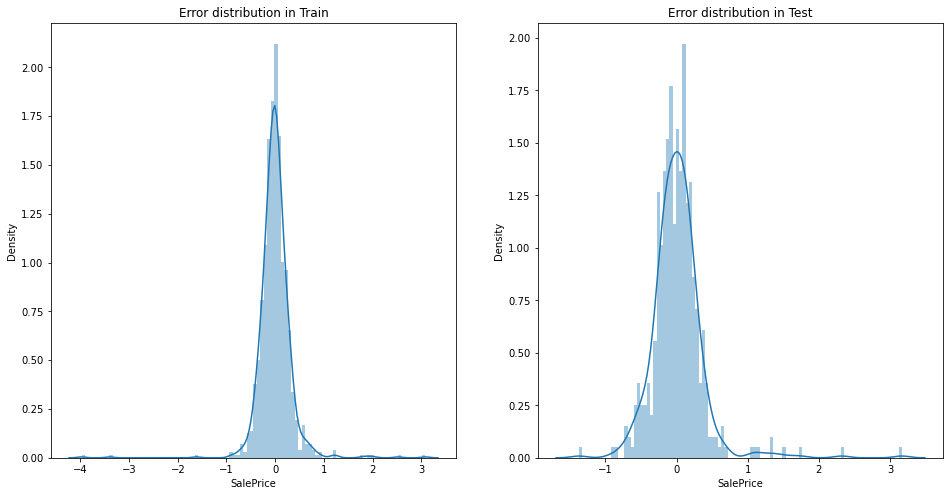

In [75]:
# Lets check the distribution of error term in ridge regression
print('Error distribution in train & test data - Ridge regression')
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot((y_train - y_train_pred_ridge),bins=100)
plt.title('Error distribution in Train')

plt.subplot(1,2,2)
sns.distplot((y_test - y_test_pred_ridge),bins=100)
plt.title('Error distribution in Test')

### Error terms are normally distributed as seen above.

## Step 5: Building the Lasso Regression Model

In [76]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = lasso.predict(X_test)
print(r2_score(y_test,y_test_pred))

metric = []
rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9430696727110708
0.6723526273704217
57.78428219826319
144.4040076151499
0.05693032728892925
0.3312018523283255


In [77]:
# List of alphas to tune
params = {'alpha': [0.0001,0.001, 0.01, 0.002, 0.1, 0.2, 0.5, 0.9, 1, 2, 5, 10, 20, 40, 50, 100, 200, 500, 1000]}
lasso = Lasso()
# cross validation
folds = 5
model_cv1 = GridSearchCV(estimator = lasso,
                      param_grid = params,
                      scoring = 'neg_mean_absolute_error',
                      cv = folds,
                      return_train_score=True,
                      verbose = 1)
model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    4.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.002, 0.1, 0.2, 0.5,
                                   0.9, 1, 2, 5, 10, 20, 40, 50, 100, 200, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
# Checking the best parameter (Alpha value)
model_cv1.best_params_

{'alpha': 0.002}

In [79]:
# Lets rebuild the lasso regression model with optimal alpha value
lasso = Lasso(alpha=0.002)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = lasso.predict(X_test)
print(r2_score(y_test,y_test_pred))

metric = []
rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.887556426941525
0.8681064372290417
114.1302266543521
58.12944230228615
0.11244357305847498
0.1333244089501976


In [80]:
mod_param_1 = list(lasso.coef_)
mod_param_1.insert(0,lasso.intercept_)
columns = df_train.columns
columns.insert(0,'constant')
lasso_coef=pd.DataFrame(list(zip(columns,mod_param_1)))
lasso_coef.columns = ['Variable','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Variable,Coef
65,Neighborhood_NridgHt,0.440329
66,Neighborhood_OldTown,0.401391
14,BsmtFullBath,0.336071
72,Neighborhood_Timber,0.314884
4,OverallCond,0.216664
165,BsmtExposure_Mn,0.211801
56,Neighborhood_Edwards,0.209189
115,Exterior1st_CBlock,0.174068
235,SaleType_Oth,0.156388
133,Exterior2nd_MetalSd,0.132540


Error distribution in train & test data - Lasso regression


Text(0.5, 1.0, 'Error distribution in Test')

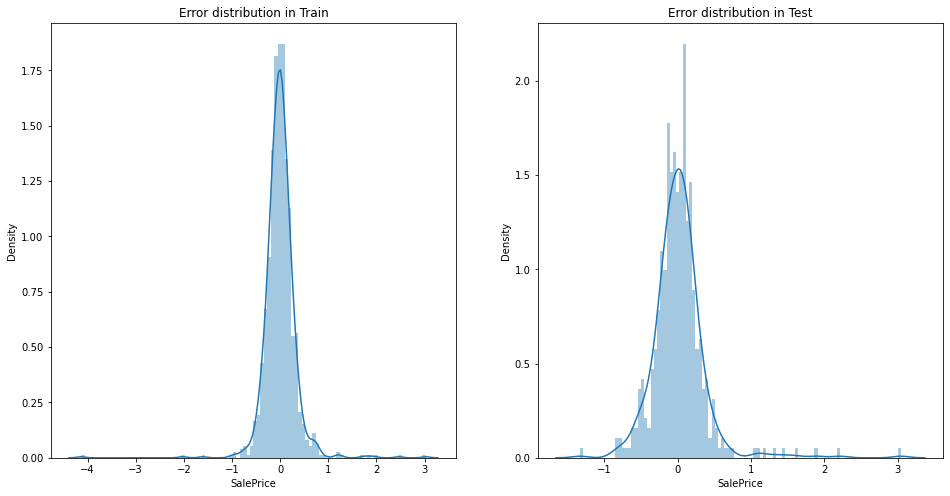

In [81]:
# Lets check the distribution of error term in Lasso regression
print('Error distribution in train & test data - Lasso regression')
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot((y_train - y_train_pred_lasso),bins=100)
plt.title('Error distribution in Train')

plt.subplot(1,2,2)
sns.distplot((y_test - y_test_pred_lasso),bins=100)
plt.title('Error distribution in Test')

## Error terms are normally distributed as seen above.

- Lets see the beta values of Ridge & Lasso model

In [82]:
betas = pd.DataFrame(index=X_train.columns)

In [83]:
betas.rows = X_train.columns

In [84]:
betas['Ridge']= ridge.coef_
betas['Lasso']=lasso.coef_

In [85]:
pd.set_option('display.max_rows',None)
betas.head(70)

,Ridge,Lasso
MSSubClass,-0.077215,-0.087592
LotFrontage,-0.034586,-0.031852
LotArea,0.056408,0.057921
OverallQual,0.220626,0.216664
OverallCond,0.068267,0.070738
YearRemodAdd,0.022661,0.022434
MasVnrArea,0.054651,0.041508
BsmtFinSF1,0.000135,-0.000000
BsmtFinSF2,0.000935,-0.001314
BsmtUnfSF,0.007323,0.002332


### We can see above that lasso has 'zero' beta values for many variables.

### Performing the Question 1 of subjective questions

In [86]:
# Lets choose double the value of Alpha
ridge_1 = Ridge(alpha=40)
ridge_1.fit(X_train, y_train)

y_train_pred = ridge_1.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge_1.predict(X_test)
print(r2_score(y_test,y_test_pred))

metric = []
rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8711481195135171
0.86296899122505
130.78465869378005
60.393668582902656
0.1288518804864828
0.138517588492896


In [87]:
mod_param_2 = list(ridge_1.coef_)
mod_param_2.insert(0,ridge_1.intercept_)
columns = df_train.columns
columns.insert(0,'constant')
ridge_coef_1=pd.DataFrame(list(zip(columns,mod_param_2)))
ridge_coef_1.columns = ['Variable','Coef']
ridge_coef_1.sort_values(by='Coef',ascending=False).head(5)

,Variable,Coef
14,BsmtFullBath,0.244420
4,OverallCond,0.230072
66,Neighborhood_OldTown,0.194872
65,Neighborhood_NridgHt,0.169091
22,WoodDeckSF,0.141086


In [88]:
# Lets choose double the value of Alpha
lasso_1 = Lasso(alpha=0.004)
lasso_1.fit(X_train, y_train)

y_train_pred = lasso_1.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = lasso_1.predict(X_test)
print(r2_score(y_test,y_test_pred))

metric = []
rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8637966212721222
0.865204572498365
138.2464294087959
59.40838097743469
0.13620337872787774
0.13625775453540065


In [89]:
mod_param_3 = list(lasso_1.coef_)
mod_param_3.insert(0,lasso_1.intercept_)
columns = df_train.columns
columns.insert(0,'constant')
lasso_coef_1=pd.DataFrame(list(zip(columns,mod_param_3)))
lasso_coef_1.columns = ['Variable','Coef']
lasso_coef_1.sort_values(by='Coef',ascending=False).head(5)

,Variable,Coef
65,Neighborhood_NridgHt,0.392399
66,Neighborhood_OldTown,0.373314
14,BsmtFullBath,0.327099
4,OverallCond,0.242199
72,Neighborhood_Timber,0.230020


### Performing the Question 3 of subjective questions

In [90]:
# The five most important variable are "Neighborhood_NridgHt,Neighborhood_OldTown,BsmtFullBath,OverallCond,Neighborhood_Timber"
imp_5_var = ['Neighborhood_NridgHt','Neighborhood_OldTown','BsmtFullBath','OverallCond','Neighborhood_Timber']

In [91]:
# Lets remove the above variables from the train & test data sets
X_train_1 = X_train.drop(imp_5_var, axis=1)
X_test_1 = X_test.drop(imp_5_var, axis=1)
X_test_1.shape

(436, 237)

## Lets rebuild the Lasso Regression model with reduced variables

In [92]:
lasso_3 = Lasso(alpha=0.0001)
lasso_3.fit(X_train_1, y_train)

y_train_pred_1 = lasso_3.predict(X_train_1)
print(r2_score(y_train,y_train_pred_1))
y_test_pred_1 = lasso_3.predict(X_test_1)
print(r2_score(y_test,y_test_pred_1))

metric = []
rss1_lr = np.sum(np.square(y_train - y_train_pred_1))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred_1))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred_1)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred_1)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9409103353644663
0.6543973513066074
59.97600960506662
152.3174353977144
0.05908966463553362
0.3493519160498037


In [93]:
# List of alphas to tune
params = {'alpha': [0.0001,0.001, 0.01, 0.002, 0.1, 0.2, 0.5, 0.9, 1, 2, 5, 10, 20, 40, 50, 100, 200, 500, 1000]}
lasso = Lasso()
# cross validation
folds = 5
model_cv2 = GridSearchCV(estimator = lasso,
                      param_grid = params,
                      scoring = 'neg_mean_absolute_error',
                      cv = folds,
                      return_train_score=True,
                      verbose = 1)
model_cv2.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    4.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.002, 0.1, 0.2, 0.5,
                                   0.9, 1, 2, 5, 10, 20, 40, 50, 100, 200, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [94]:
# Checking the best parameter (Alpha value)
model_cv2.best_params_

{'alpha': 0.002}

In [95]:
lasso_4 = Lasso(alpha=0.001)
lasso_4.fit(X_train_1, y_train)

y_train_pred_1 = lasso_4.predict(X_train_1)
print(r2_score(y_train,y_train_pred_1))
y_test_pred_1 = lasso_4.predict(X_test_1)
print(r2_score(y_test,y_test_pred_1))

metric = []
rss1_lr = np.sum(np.square(y_train - y_train_pred_1))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred_1))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred_1)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred_1)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8963455445741996
0.856965999692962
105.20927225718745
63.039366694125796
0.10365445542580044
0.14458570342689403


In [96]:
mod_param = list(lasso_4.coef_)
mod_param.insert(0,lasso_4.intercept_)
columns = X_train_1.columns
columns.insert(0,'constant')
lasso_coef=pd.DataFrame(list(zip(columns,mod_param)))
lasso_coef.columns = ['Variable','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(5)

,Variable,Coef
107,Exterior1st_AsphShn,0.485670
63,Neighborhood_SWISU,0.368531
13,BsmtHalfBath,0.351735
101,RoofMatl_Membran,0.265548
128,Exterior2nd_MetalSd,0.259904


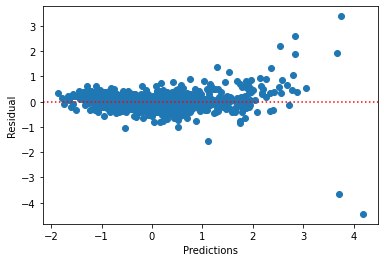

In [97]:
# Residual Analysis
y_res = y_train - y_train_pred
df_train['res'] = y_res
plt.scatter(y_train_pred, df_train['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Form above we can say that the residuals are spread out randomly around the 0 axis.

### Best alpha value for Ridge = 20
### Best alpha value for Lasso = 0.002